In [112]:
import torch
from torch import nn 
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd

# workflow

In [113]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

### spliting data 

In [114]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)
device = "cpu"
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)


### plot data

In [115]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data.cpu(), train_labels.cpu(), c='b', s=4, label="training data")
    plt.scatter(test_data.cpu(), test_labels.cpu(), c='g', s=4, label="testing data")
    
    if predictions is not None:
        plt.scatter(test_data.cpu(), predictions.cpu(), c='r', s=4, label="predictions")
    
    plt.legend(prop={"size": 14})
    plt.show()
        
    

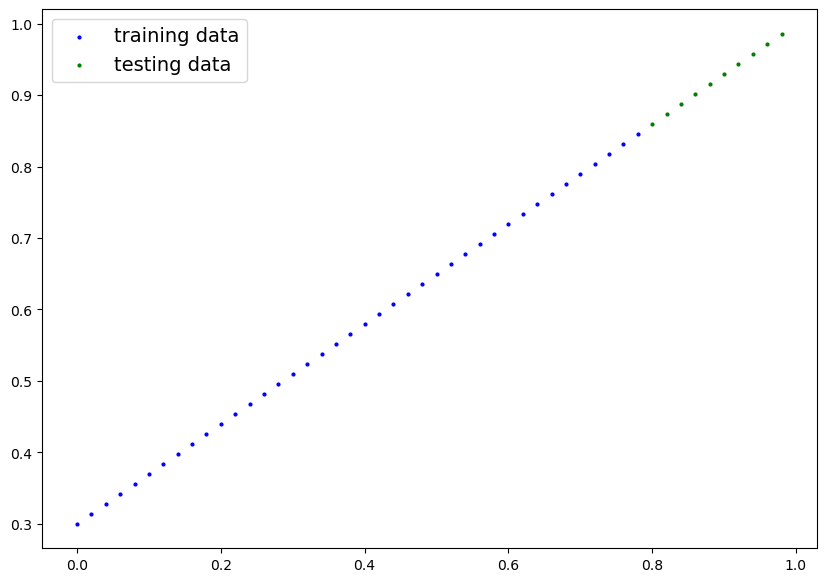

In [116]:
plot_predictions()

### building model

In [117]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        
        self.bias = nn.Parameter(torch.randn(1, 
                                             requires_grad=True, 
                                             dtype=torch.float))
        
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


In [118]:
torch.manual_seed(42)

model = LinearRegressionModel().to(device)
print(list(model.parameters()))
model.state_dict()

[Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### making predictions

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


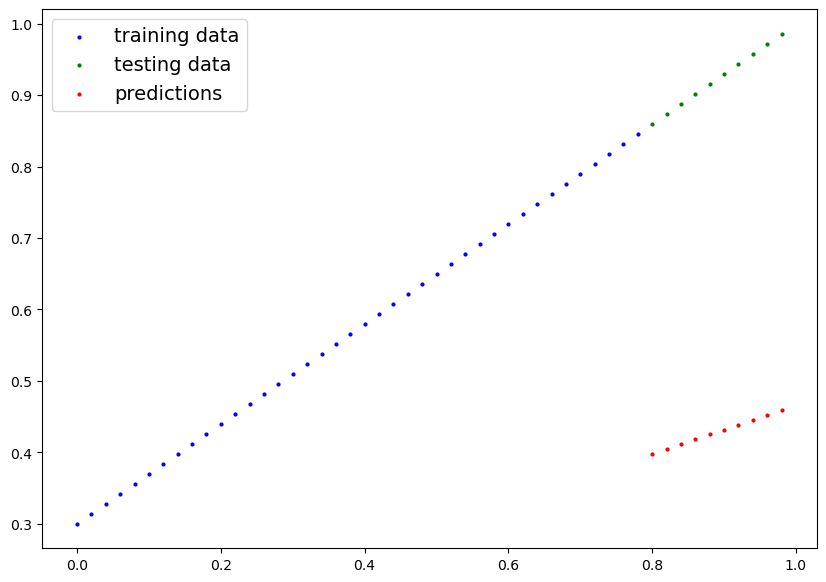

In [119]:
with torch.inference_mode():
    y_preds = model(X_test)

print(y_preds)
plot_predictions(predictions=y_preds)

### training model

In [120]:
loss_fun = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.001)

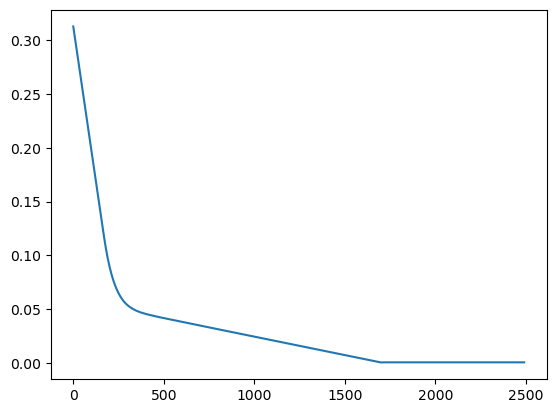

In [121]:
x_axis, y_axis = [], []
epochs = 2500 # epoch is one loop htrough the data
for epoch in range(epochs):
    model.train() 
    
    #forwardpass
    y_preds = model(X_train)
    
    #calculate loss
    loss = loss_fun(y_preds, y_train)
    
    # optimizer zero grad
    optimizer.zero_grad()
    
    # backprapagation
    loss.backward()
    
    # step the optimizer
    optimizer.step()
    
    # testing
    model.eval()
    with torch.inference_mode():
        # forward pass
        test_pred = model(X_test)
        
        #calcuate the loss
        test_loss = loss_fun(test_pred, y_test)

        if epoch % 10 == 0:
            x_axis.append(epoch)
            y_axis.append(float(loss))

# ploting loss
plt.plot(x_axis, y_axis)
plt.show()
        
     

0.7 0.3
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])


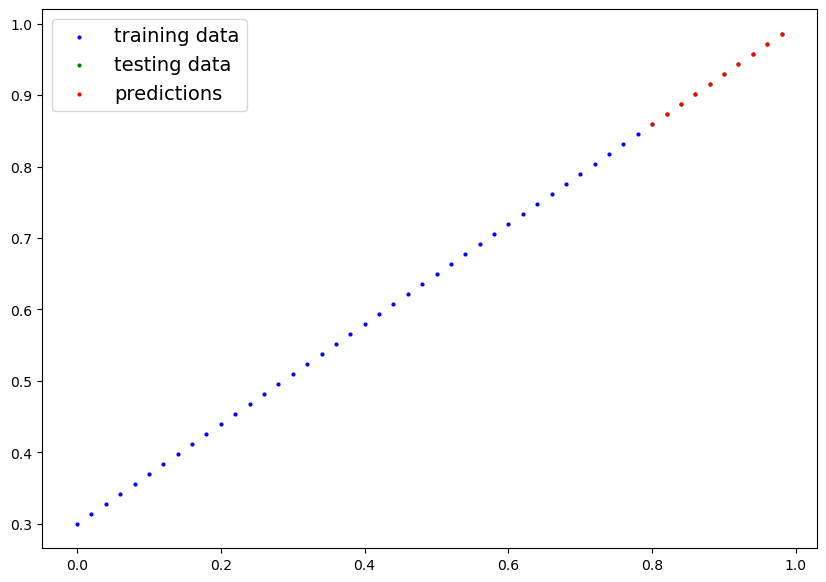

In [122]:
print(weight, bias)
print(model.state_dict())

with torch.inference_mode():
    y_preds = model(X_test)

print(y_preds)
plot_predictions(predictions=y_preds)


### save model

In [123]:
torch.save(model.state_dict(), "model0")

### load model

0.7 0.3
OrderedDict([('weights', tensor([0.6994])), ('bias', tensor([0.2998]))])
tensor([[0.8593],
        [0.8733],
        [0.8873],
        [0.9013],
        [0.9152],
        [0.9292],
        [0.9432],
        [0.9572],
        [0.9712],
        [0.9852]])


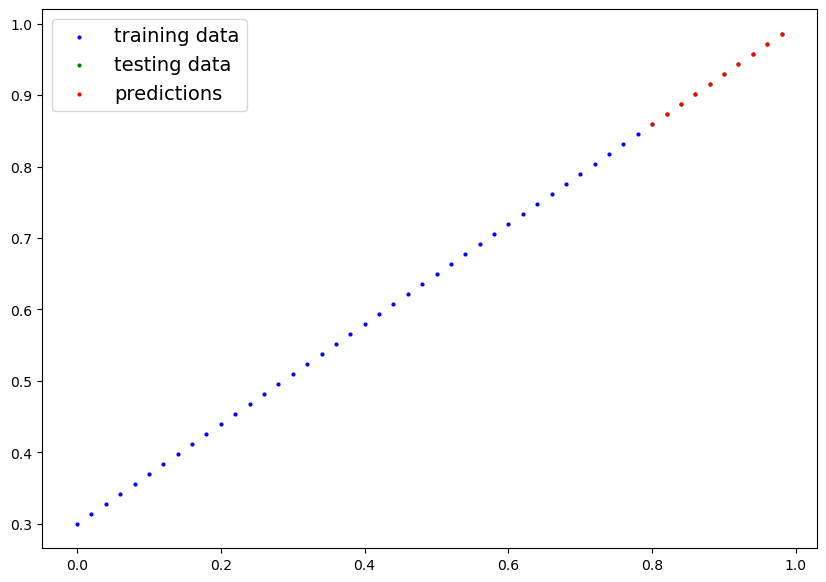

In [124]:
model = LinearRegressionModel()
model.load_state_dict(torch.load("model0"))
model = model.to(device)
model.eval()
print(weight, bias)
print(model.state_dict())

with torch.inference_mode():
    y_preds = model(X_test)

print(y_preds)
plot_predictions(predictions=y_preds)

### putting it all together

In [125]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"useing device: {device}")

useing device: cuda


### data

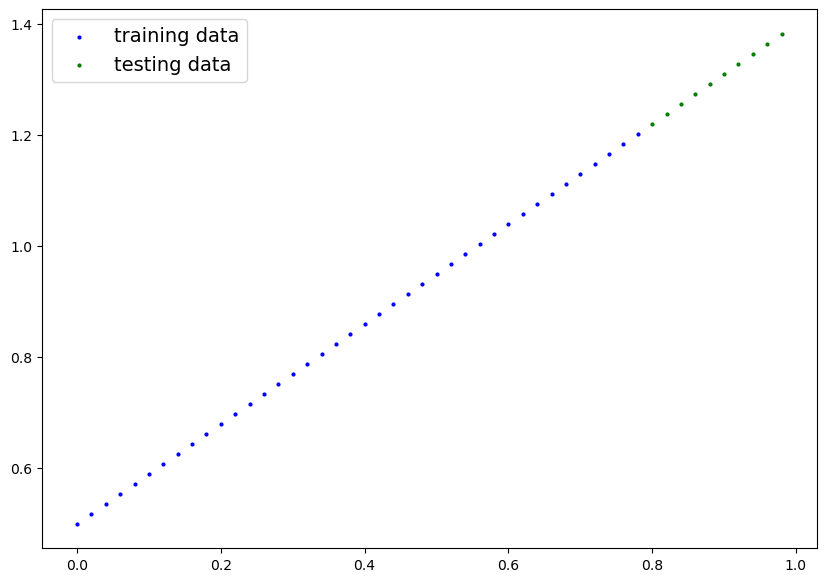

In [126]:
weight = 0.9
bias = 0.5

start = 0 
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split].to(device), y[:train_split].to(device)
X_test, y_test = X[train_split:].to(device), y[train_split:].to(device)

plot_predictions(X_train, y_train, X_test, y_test)

### making model

In [127]:
class LinearRegressionModel2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1,
                                          out_features=1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    
torch.manual_seed(42)
model = LinearRegressionModel2().to(device)
model, model.state_dict()

(LinearRegressionModel2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.8300], device='cuda:0'))]))

### training

In [128]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)


In [129]:
torch.manual_seed(42)

epochs = 2500
for epoch in range(epochs):
    model.train()
    y_preds = model(X_train)
    loss = loss_fn(y_preds, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model.eval()
    with  torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fun(test_pred, y_test) 
        
        if epoch % 10 == 0: 
            print(f'{epoch}, {loss}, {test_loss}')

0, 0.27717795968055725, 0.2081001251935959
10, 0.26565709710121155, 0.19462934136390686
20, 0.25413626432418823, 0.18115851283073425
30, 0.24261541664600372, 0.16768769919872284
40, 0.23109455406665802, 0.1542169153690338
50, 0.2195737361907959, 0.1407461017370224
60, 0.2080528736114502, 0.12727530300617218
70, 0.19653204083442688, 0.11380445212125778
80, 0.18501119315624237, 0.10033366829156876
90, 0.17349033057689667, 0.08686286211013794
100, 0.16196949779987335, 0.07339202612638474
110, 0.15044863522052765, 0.059921231120824814
120, 0.13892780244350433, 0.046450402587652206
130, 0.12740695476531982, 0.032979585230350494
140, 0.11588611453771591, 0.019508792087435722
150, 0.1043652817606926, 0.010577904991805553
160, 0.09284442663192749, 0.011299646459519863
170, 0.08132358640432358, 0.020903659984469414
180, 0.0713840052485466, 0.03311190754175186
190, 0.06439930945634842, 0.04308757930994034
200, 0.05929842218756676, 0.05137215927243233
210, 0.0554778054356575, 0.058316972106695175

OrderedDict([('linear_layer.weight', tensor([[0.8995]], device='cuda:0')), ('linear_layer.bias', tensor([0.5006], device='cuda:0'))])
0.9 0.5


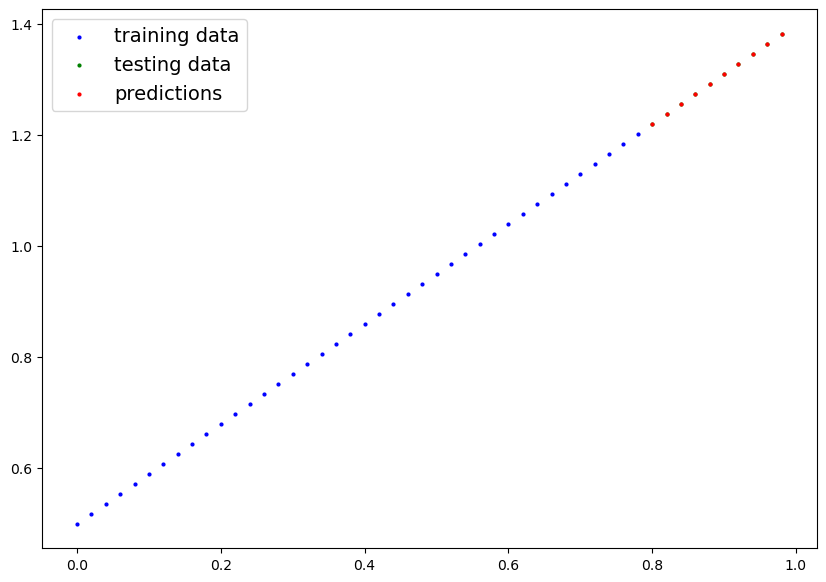

In [130]:
print(model.state_dict())
print(weight, bias)
plot_predictions(X_train, y_train, X_test, y_test, test_pred)